### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 7

# PreLab

Import the libraries

In [151]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## Bagging Model

In [152]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Create a Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    max_samples=0.8,
    max_features=0.8,
)
# Train the model
bagging_model.fit(X_train, y_train)
# Make predictions
y_pred = bagging_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Model: {accuracy * 100:.2f}%")

Accuracy of Bagging Model: 96.49%


## Building Random Forests

###  Loading and Exploring the Dataset

In [153]:
# Load the dataset
data = load_breast_cancer()
# Convert to DataFrame for better exploration
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
# Explore the dataset
print(df.head())
print(df["target"].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Splitting into Training and Testing Sets

In [154]:
# Split the dataset into training and testing sets
X = df.drop(columns="target")  # Features
y = df["target"]  # Target
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (455, 30)
Testing data shape: (114, 30)


### Building the Random Forest Classifier

In [155]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Making Predictions and Evaluating the Model

Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



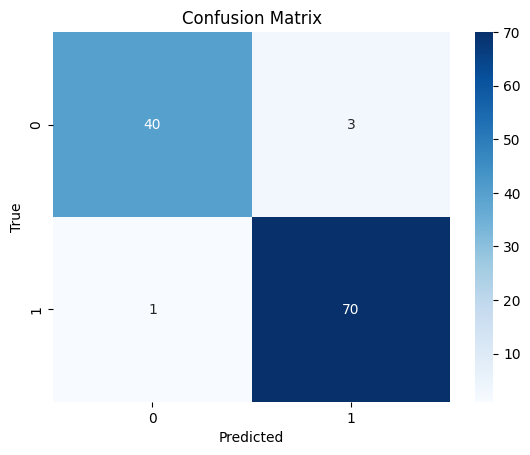

In [156]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Feature Importance

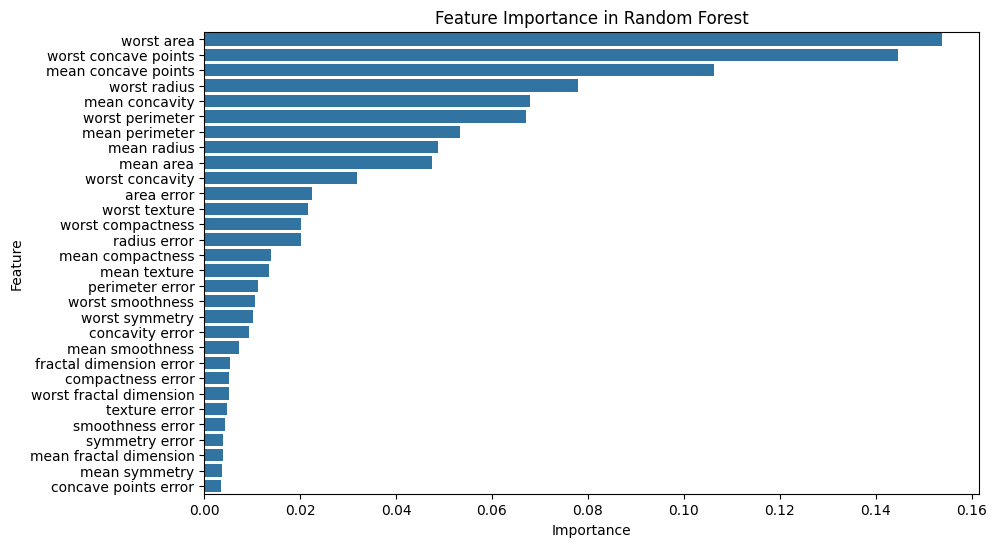

In [157]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Random Forest")
plt.show()

## Random Forests in Practice

### Hyperparameter Tuning with GridSearchCV

In [158]:
# Define the model
clf = RandomForestClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1
)
# Fit the model to data
grid_search.fit(X_train, y_train)
# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


## Boosting: Ada Boost

### Building AdaBoost Models

In [159]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Initialize and train an AdaBoost Classifier with Decision Trees as base learners
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=1
    ),  # Using shallow trees (weak learners)
    n_estimators=100,  # Number of weak learners
    learning_rate=0.1,  # Learning rate for updating weights
    random_state=42,
)

ada_clf.fit(X_train, y_train)
# Make predictions
y_pred = ada_clf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Model: {accuracy * 100:.2f}%")

Accuracy of AdaBoost Model: 96.67%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Mini Challenge

## Pre-Requisites
- Pip installs
- Importing libraries
- Loading Dataset

In [161]:
%pip install ucimlrepo
# %pip install shap
# downgrade numpy to 2.0
# %pip uninstall numpy

In [162]:
# importing libraries

from ucimlrepo import fetch_ucirepo
import shap

In [163]:
# Loading dataset
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

## Cleaning Data

In [164]:
# Check for missing values
print(X.isnull().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


### Binarizing Target Column

In [165]:
# # Binarizing the target variable
y.loc[:, "poisonous"] = y["poisonous"].map({"p": 1, "e": 0})

### Handling Missing values

There are three ways to handle the missing values in the stalk-root column
- Drop the column
- Drop the rows with the missing columns
- Or we can train a mosel to predict the column's missing values

Since this column has around 2480 missing values it constitutes around 31% of the dataset so it would be unwise to drop the rows

We can wither drop this whole column or train a model to predict the missing values

- we are going with training a model this time

#### Training model to predict missing values for stalk-root

cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
cap-shape_s    0
              ..
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
stalk-root     0
Length: 113, dtype: int64
Accuracy: 93.80%
              precision    recall  f1-score   support

           b       0.97      0.93      0.95      1087
           c       0.70      1.00      0.82       172
           e       1.00      0.91      0.95       363
           r       1.00      1.00      1.00        72

    accuracy                           0.94      1694
   macro avg       0.92      0.96      0.93      1694
weighted avg       0.95      0.94      0.94      1694



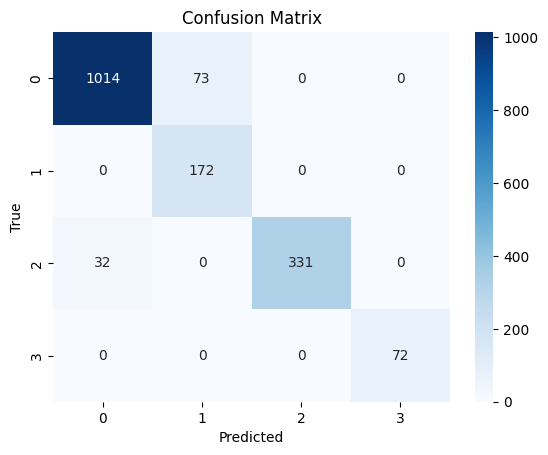

In [166]:
# combine X
data = X.copy()

# drop stalk-root column
data = data.drop(columns="stalk-root")
# One Hot Encoding other than stalk-root
data = pd.get_dummies(data)

# Add the target variable
data["stalk-root"] = X["stalk-root"]

# drop rows with missing values
data = data.dropna()

# Check for missing values
print(data.isnull().sum())

# Split the dataset into training and testing sets
missing_X = data.drop(columns="stalk-root")  # Features
missing_y = data["stalk-root"]  # Target

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    missing_X, missing_y, test_size=0.3, random_state=42
)

# Create the Random Forest model
missing_rf_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model on the training data
missing_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = missing_rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# save the feature names
feature_names = data.columns

#### Filling the missing values with predicted values

In [167]:
# fill the missing values of stalk-root column using the trained model

new_data = X.copy()

# remove the stalk-root column
new_data = new_data.drop(columns="stalk-root")

# one hot encode the features
new_data = pd.get_dummies(new_data)

# add back the stalk-root column
new_data["stalk-root"] = X["stalk-root"]

# get the missing values
missing_data = new_data[new_data["stalk-root"].isnull()]

# drop the stalk-root column
missing_X = missing_data.drop(columns="stalk-root")

# predict the missing values
missing_values = missing_rf_model.predict(missing_X)

# fill the missing values
for i, value in zip(missing_data.index, missing_values):
    X.at[i, "stalk-root"] = value

# Check for missing values
print(X.isnull().sum())


cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


## Training the Model

### Label encoding columns

In [168]:
# Label encoding the columns
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode the target variable
y = le.fit_transform(y.values.ravel())

# Label encode the features
for col in X.columns:
    X.loc[:, col] = le.fit_transform(X[col])

### Splitting into training and test sets

In [169]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69
)

### Model Training

Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       840
           1       0.98      0.95      0.96       785

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



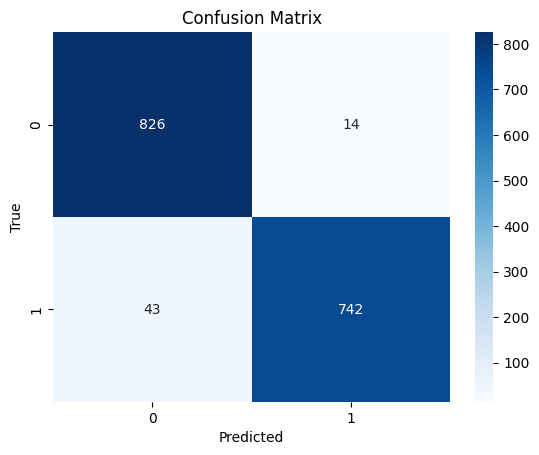

In [170]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_split=4, min_samples_leaf=4,ccp_alpha=0.04,random_state=69)

# Ensure the target variable is properly binarized or categorized
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## GridSearchCV to optimize hyperparameters
- Use GridSearchCV to optimize hyperparameters and provide your best parameter set.

In [171]:
# using GridSearchCV to find the best hyperparameters
# Define the model
clf = RandomForestClassifier(random_state=69)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1
)

# Fit the model to data
grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### Make Best Model using the found hyperparameters

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



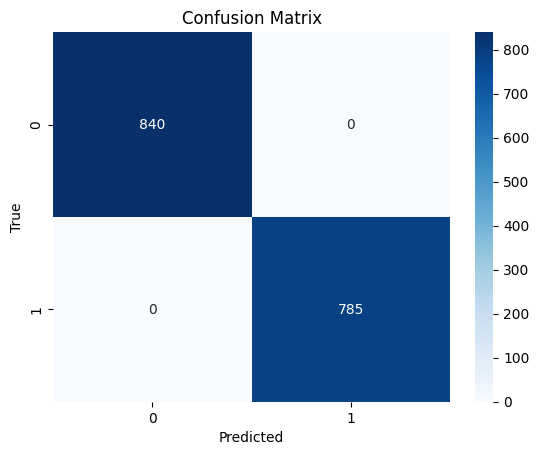

In [172]:
# Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

# Create the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=69,
)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## Questions:

### Can you make your Random Forest model prioritize safety (avoiding the poisonous mushrooms) by improving recall on the poisonous class?

- We can increase the weight of poisonous class and give less weight to non-poisonous class

Accuracy: 93.97%
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       840
           1       0.90      0.98      0.94       785

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



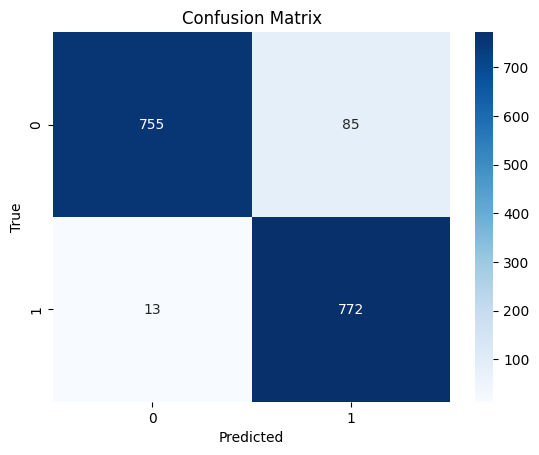

In [173]:
weights = {
    0: 1,
    1: 5,  # Adjusted weight to a more balanced ratio
}

# Create the Random Forest model with the best hyperparameters
weighted_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_split=4,
    min_samples_leaf=5,
    class_weight=weights,
    ccp_alpha=0.02,
    random_state=69,
)

# Train the model on the training data
weighted_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = weighted_rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

###  Use class weights to handle any imbalanced data. Can you create a new feature (combining features like color and odor) that improves model performance? Analyze correlations between features and use this to guide your feature selection.

- There is no need as model is already accurate enough

## SHAP
- We will now use SHAP to explain Predictions

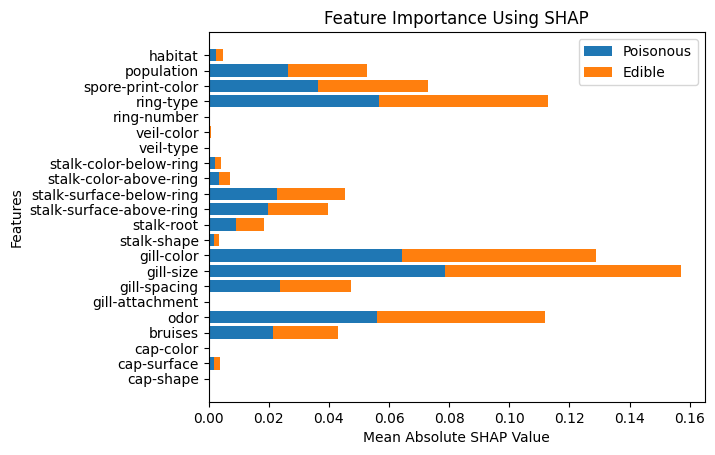

In [174]:
import shap

# Assuming rf_model is trained and X_test is defined
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# for i in shap_values[0]:
#   print(len(i))

mean_shap_values = np.abs(shap_values).mean(axis=0)

mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

mean_abs_shap_values_0 = []
mean_abs_shap_values_1 = []

for i in range(len(mean_abs_shap_values)):
    mean_abs_shap_values_0.append(mean_abs_shap_values[i][0])
    mean_abs_shap_values_1.append(mean_abs_shap_values[i][1])

plt.barh(X_test.columns, mean_abs_shap_values_0, label="Poisonous")
plt.barh(X_test.columns, mean_abs_shap_values_1, left=mean_abs_shap_values_0, label="Edible")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.title("Feature Importance Using SHAP")
plt.legend()
plt.show()

### Explaining a single instance with the help of SHAP

In [175]:
class_index = 0  # Index of the instance you want to explain
instance = shap_values[class_index]

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[class_index],  # Specify the class index here
    shap_values=instance[..., class_index],  # Same for instance SHAP values
    features=X_test.iloc[class_index, :],
    link="logit"
)

In [176]:
class_index = 1  # Index of the instance you want to explain
instance = shap_values[class_index]

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[class_index],  # Specify the class index here
    shap_values=instance[..., class_index],  # Same for instance SHAP values
    features=X_test.iloc[class_index, :],
    link="logit"
)

# Conclusion

The arrows show how much each feature shifts the base value up or down to arrive at the final prediction.

- Red Arrows (Positive Contribution):
    
    Features that push the model’s prediction higher, contributing positively towards the predicted class.

- Blue Arrows (Negative Contribution):
    
    Features that push the model’s prediction lower, contributing negatively towards the predicted class.

The force plot helps visualize how each feature impacts a specific prediction.
In the first instance, more features contributed positively, pushing the prediction higher, while the second instance saw significant negative contributions.

These visualizations are particularly helpful for understanding which specific feature values are most influential in each prediction, making the SHAP force plot a powerful tool for interpretability in machine learning models.

